# Doing the stuff the way it goes in the book

Importing all the stuff

In [0]:
import keras
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import copy

Using TensorFlow backend.


Loading the data

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Looking at the data

In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
train_labels[10]

3

In [0]:
max([max(sequence) for sequence in train_data])

9999

Decoding the data to see actual text

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = reuters.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [0]:
decoded_review

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

Preparing the data

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [0]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building network

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

Preparing network to be used

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Preparing validation data

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Performing training

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 1s 183us/step - loss: 3.2844 - acc: 0.4975 - val_loss: 2.7879 - val_acc: 0.5360
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 2.3851 - acc: 0.4241 - val_loss: 2.0732 - val_acc: 0.3540
Epoch 3/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.7998 - acc: 0.3514 - val_loss: 1.7077 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.3941 - acc: 0.3514 - val_loss: 1.4513 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 1s 136us/step - loss: 1.1507 - acc: 0.3867 - val_loss: 1.2101 - val_acc: 0.6710
Epoch 6/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.7177 - acc: 0.8399 - val_loss: 0.9459 - val_acc: 0.8060
Epoch 7/20
7982/7982 [============

Looking at the training performance history

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

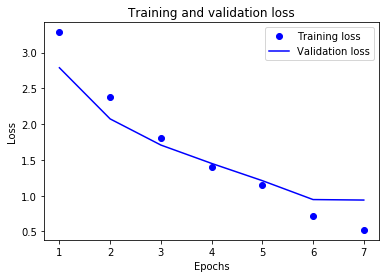

In [0]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

<Figure size 432x288 with 0 Axes>

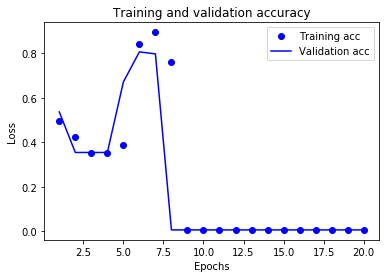

In [0]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

New model and it's evaluation

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 184us/step - loss: 2.5416 - acc: 0.5371 - val_loss: 1.7163 - val_acc: 0.6290
Epoch 2/8
7982/7982 [==============================] - 1s 139us/step - loss: 1.4006 - acc: 0.7070 - val_loss: 1.3295 - val_acc: 0.6980
Epoch 3/8
7982/7982 [==============================] - 1s 137us/step - loss: 1.0514 - acc: 0.7694 - val_loss: 1.1884 - val_acc: 0.7470
Epoch 4/8
7982/7982 [==============================] - 1s 134us/step - loss: 0.8222 - acc: 0.8276 - val_loss: 1.0694 - val_acc: 0.7780
Epoch 5/8
7982/7982 [==============================] - 1s 138us/step - loss: 0.6547 - acc: 0.8637 - val_loss: 1.0651 - val_acc: 0.7650
Epoch 6/8
7982/7982 [==============================] - 1s 135us/step - loss: 0.5216 - acc: 0.8896 - val_loss: 0.9520 - val_acc: 0.8090
Epoch 7/8
7982/7982 [==============================] - 1s 138us/step - loss: 0.4158 - acc: 0.9138 - val_loss: 0.9662 - val_acc: 0.8020
Epoch 8

In [0]:
results

[0.9926834533178477, 0.7822796082188801]

Comparing to random baseline

In [0]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19456812110418523

Prediction

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

0.9999998

In [0]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

Labels as integer tensors

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [0]:
partial_x_train.shape

(7982, 10000)

In [0]:
y_val.max()

45

Changing loss to work with integer labels instead of categorical labels

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

New model

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# model.summary()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 269us/step - loss: 2.9107 - acc: 0.2625 - val_loss: 2.1015 - val_acc: 0.5460
Epoch 2/20
7982/7982 [==============================] - 2s 218us/step - loss: 1.7806 - acc: 0.5578 - val_loss: 1.6589 - val_acc: 0.5660
Epoch 3/20
7982/7982 [==============================] - 1s 187us/step - loss: 1.4559 - acc: 0.5946 - val_loss: 1.4956 - val_acc: 0.6120
Epoch 4/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.2576 - acc: 0.6555 - val_loss: 1.4069 - val_acc: 0.6560
Epoch 5/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.1084 - acc: 0.7022 - val_loss: 1.3704 - val_acc: 0.6660
Epoch 6/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.9898 - acc: 0.7305 - val_loss: 1.3226 - val_acc: 0.6780
Epoch 7/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.8889 - acc: 0.7672 - val_loss: 1.3137 - val_acc: 0.6940


### Experiments

In [0]:
def experiment(units=64, hidden=1):
  model = models.Sequential()
  model.add(layers.Dense(units, activation='relu', input_shape=(10000,)))
  if hidden > 1:
    model.add(layers.Dense(4, activation='relu'))
    for _ in range(hidden-2):
      model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))

  model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=128,
            validation_data=(x_val, y_val))
  
  return model.evaluate(x_test, y_test)

Try using larger or smaller layers: 32 units, 128 units...

In [0]:
experiment(32)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 175us/step - loss: 2.2802 - acc: 0.5916 - val_loss: 1.5030 - val_acc: 0.6760
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.2115 - acc: 0.7471 - val_loss: 1.1494 - val_acc: 0.7600
Epoch 3/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.8969 - acc: 0.8152 - val_loss: 1.0115 - val_acc: 0.7950
Epoch 4/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.6995 - acc: 0.8573 - val_loss: 0.9228 - val_acc: 0.8170
Epoch 5/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.5538 - acc: 0.8865 - val_loss: 0.8810 - val_acc: 0.8180
Epoch 6/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.4460 - acc: 0.9082 - val_loss: 0.8460 - val_acc: 0.8230
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.3640 - acc: 0.9246 - val_loss: 0.8417 - val_acc: 0.8230


[1.1686360833906002, 0.7889581478183437]

In [0]:
experiment(128)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 318us/step - loss: 1.6068 - acc: 0.6771 - val_loss: 1.0520 - val_acc: 0.7860
Epoch 2/20
7982/7982 [==============================] - 2s 279us/step - loss: 0.7403 - acc: 0.8453 - val_loss: 0.8737 - val_acc: 0.8110
Epoch 3/20
7982/7982 [==============================] - 2s 276us/step - loss: 0.4591 - acc: 0.9039 - val_loss: 0.7944 - val_acc: 0.8250
Epoch 4/20
7982/7982 [==============================] - 2s 280us/step - loss: 0.3119 - acc: 0.9330 - val_loss: 0.7819 - val_acc: 0.8390
Epoch 5/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.2382 - acc: 0.9420 - val_loss: 0.8168 - val_acc: 0.8310
Epoch 6/20
7982/7982 [==============================] - 3s 332us/step - loss: 0.1963 - acc: 0.9499 - val_loss: 0.8445 - val_acc: 0.8230
Epoch 7/20
7982/7982 [==============================] - 2s 283us/step - loss: 0.1693 - acc: 0.9539 - val_loss: 0.8888 - val_acc: 0.8240


[1.4795476751251084, 0.7724844167408726]

We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

In [0]:
experiment(hidden=2)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 230us/step - loss: 2.9164 - acc: 0.2387 - val_loss: 2.1149 - val_acc: 0.5760
Epoch 2/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.7348 - acc: 0.5981 - val_loss: 1.6001 - val_acc: 0.6020
Epoch 3/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.4195 - acc: 0.6254 - val_loss: 1.5046 - val_acc: 0.6150
Epoch 4/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.2669 - acc: 0.6507 - val_loss: 1.4416 - val_acc: 0.6490
Epoch 5/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.1486 - acc: 0.6921 - val_loss: 1.4153 - val_acc: 0.6640
Epoch 6/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.0458 - acc: 0.7221 - val_loss: 1.3769 - val_acc: 0.6720
Epoch 7/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.9510 - acc: 0.7407 - val_loss: 1.3756 - val_acc: 0.6770


[1.8030590057797657, 0.6954585931073951]

In [0]:
experiment(hidden=3)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 235us/step - loss: 2.6873 - acc: 0.3730 - val_loss: 1.8103 - val_acc: 0.5830
Epoch 2/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.5977 - acc: 0.6006 - val_loss: 1.5034 - val_acc: 0.6150
Epoch 3/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.3288 - acc: 0.6432 - val_loss: 1.4104 - val_acc: 0.6320
Epoch 4/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.1373 - acc: 0.7082 - val_loss: 1.3018 - val_acc: 0.6940
Epoch 5/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.9981 - acc: 0.7523 - val_loss: 1.2705 - val_acc: 0.7070
Epoch 6/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.8903 - acc: 0.7747 - val_loss: 1.2764 - val_acc: 0.7150
Epoch 7/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.8024 - acc: 0.7953 - val_loss: 1.2672 - val_acc: 0.7180


[2.132171247011832, 0.6763134461795233]